![](../images/logos.jpg "MiCMOR, KIT Campus Alpin")

**[MiCMOR](https://micmor.kit.edu) [SummerSchool "Environmental Data Science: From Data Exploration to Deep Learning"](https://micmor.kit.edu/sites/default/files/MICMoR%20Summer%20School%202019%20Flyer.pdf)**  
IMK-IFU KIT Campus Alpin, Sept. 4 - 13 2019, Garmisch-Partenkirchen, Germany.

---

# Some more xarray analysis

Example from: https://rabernat.github.io/research_computing_2018/intermediate-xarray.html  

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pylab as plt

First, we want to replicate this plot here... It shows the SST ENSO anomalies...

Lets try to reproduce this...

![](https://www.ncdc.noaa.gov/monitoring-content/teleconnections/eln-f-pg.gif)

In [3]:
ds = xr.open_dataset('../data/other/NOAA_NCDC_ERSST_v3b_SST.nc')
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

In [4]:
# convert to -180/180 
ds.coords['lon'] = (ds.coords['lon'] + 180) % 360 - 180
ds = ds.sortby(ds.lon)

Let's select the regions first.

In [6]:
a = ds.sel(lat=slice(-5,5), lon=slice(-170,-120)).mean(dim=['lat','lon'])
a

<xarray.Dataset>
Dimensions:  (time: 684)
Coordinates:
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time) float32 26.24854 26.27408 26.971754 ... 25.722889 25.758188

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


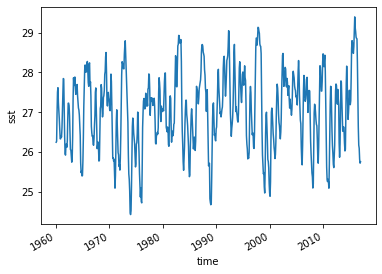

In [8]:
a.sst.plot();

Then we compute the diff between value and average value for the sst variable. We also do a rolling window smooth (size=3)...

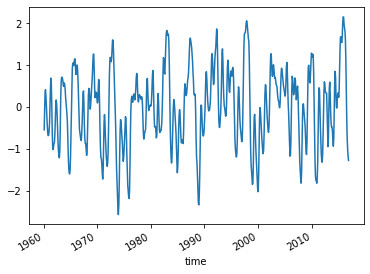

In [10]:
ts = (a - a.mean()).sst.rolling(time=3, center=True).mean()
ts.plot();

And now we try to replicate the plot by going into details with matplotlib...

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less_equal
  


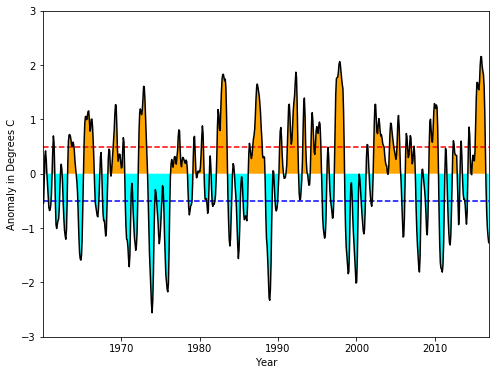

In [12]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
y2=np.zeros_like(ts.values)

ax.hlines(0.5, ts.time.values[0], ts.time.values[-1], color='red', ls='--')
ax.hlines(-0.5, ts.time.values[0], ts.time.values[-1], color='blue', ls='--')
ax.plot(ts.time.values, ts.values, c='black')
ax.fill_between(ts.time.values, ts.values, y2, where=ts.values > 0, facecolor='orange', lw=.5)
ax.fill_between(ts.time.values, ts.values, y2, where=ts.values <=0, facecolor='cyan', lw=.5)
ax.set_xlim(ts.time.values[0], ts.time.values[-1])
ax.set_ylim(-3,3)
ax.set_ylabel('Anomaly in Degrees C')
ax.set_xlabel('Year');